In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# cifar iamges

In [5]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets

--2020-04-28 19:59:26--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘datasets/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  1.34MB/s    in 2m 55s  

2020-04-28 20:02:23 (952 KB/s) - ‘datasets/cifar-10-python.tar.gz’ saved [170498071/170498071]



In [9]:
!tar xf datasets/cifar-10-python.tar.gz -C datasets

In [10]:
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
    X = pickle.load(input_file, encoding='latin1')

In [11]:
X = X['data']

In [13]:
X.shape
# 10000 images, height * width *channels

(10000, 3072)

In [14]:
X = X.reshape((-1, 3,32,32))

In [16]:
X.shape

(10000, 3, 32, 32)

In [17]:
X = X.transpose(0, 2,3,1)
X.shape

(10000, 32, 32, 3)

In [18]:
X = X.reshape(-1, 3*32*32)

In [19]:
X.shape

(10000, 3072)

In [20]:
# lets look at a image

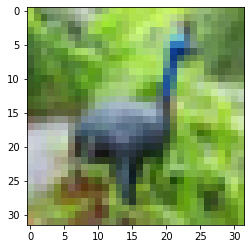

In [21]:
plt.imshow(X[6].reshape(32,32,3))


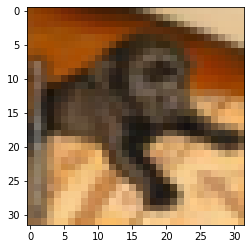

In [22]:
plt.imshow(X[56].reshape(32,32,3))


In [23]:
# standarization

In [24]:
X = X - X.mean(axis = 0)

In [25]:
X= X /np.std(X, axis =0)

In [26]:
def show(i):
    i = i.reshape((32,32,3))
    m, M = i.min(), i.max()
    
    plt.imshow((i-m) / (M -m))
    plt.show()

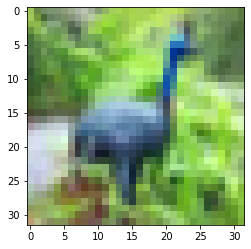

In [27]:
show(X[6])

In [28]:
# whitening - used to de co relate features in iamges

In [31]:
X_subset = X[:100]

In [33]:
X_subset.shape # taking only 100 images

(100, 3072)

Whitening is the transofrmation of data in such a way that its coraiiance matrix is te identitiy matrix - the effect of whiteningis to decorealte the features.

In [34]:
# calculating the covariance matrix of images.

In [35]:
cov = np.cov(X_subset, rowvar=True)

In [36]:
cov.shape

(100, 100)

In [37]:
# USING SVD FOR DECOMPOSITON

In [38]:
U,S,V = np.linalg.svd(cov)

In [39]:
print(U.shape)
print(S.shape)
print(V.shape)

(100, 100)
(100,)
(100, 100)


now calcualting the principal componetnst of image features

In [40]:
epsilon = 1e-5

In [41]:
zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

In [42]:
zca_matrix.shape

(100, 100)

In [43]:
# now whitening

zca = np.dot(zca_matrix, X_subset)

In [44]:
zca.shape

(100, 3072)

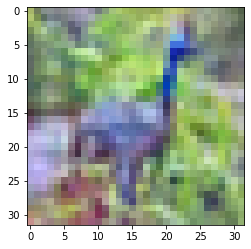

In [46]:
show(zca[6])
# now  the features are not co related

# Using Pytorch Transforms

In [57]:
import torch
import torchvision
import torchvision.transforms as transforms

In [58]:
# number of image transformation you can apply in pytorch

In [59]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [60]:
# creating a sequence of object for transofrmation

In [61]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

In [62]:
datasets = torchvision.datasets.CIFAR10(root = './datasets/cifar10/train', download=True, transform= transform)

Extracting ./datasets/cifar10/train/cifar-10-python.tar.gz to ./datasets/cifar10/train


In [64]:
datasets

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets/cifar10/train
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [66]:
dataloader = torch.utils.data.DataLoader(datasets, batch_size =16, shuffle = True)

In [67]:
images_batch, labels_batch = iter(dataloader).next()

In [68]:
images_batch.shape

torch.Size([16, 3, 256, 256])

In [69]:
labels_batch.shape

torch.Size([16])

In [70]:
labels_batch

tensor([2, 6, 7, 9, 5, 9, 5, 3, 0, 7, 7, 1, 4, 8, 4, 7])

In [72]:
img = torchvision.utils.make_grid(images_batch)

In [73]:
img.shape

torch.Size([3, 518, 2066])

In [74]:
img = np.transpose(img, (1,2, 0))

In [75]:
img.shape

torch.Size([518, 2066, 3])

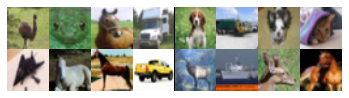

In [76]:
plt.figure(figsize = (6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [77]:
# mean and standard deviation of images 

In [79]:
pop_mean = []
pop_std = []


In [80]:
for i, data in enumerate(dataloader , 0):
    numpy_iamge = data[0].numpy()
    
    batch_mean = np.mean(numpy_iamge, axis =(0,2,3))
    batch_std = np.std(numpy_iamge, axis=(0,2,3))
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)

In [81]:
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

In [82]:
pop_mean.shape, pop_std.shape

((3125, 3), (3125, 3))

In [83]:
pop_mean = pop_mean.mean(axis =0)
pop_std = pop_std.mean(axis =0 )

In [84]:
pop_mean

array([0.49159113, 0.48234683, 0.44671977], dtype=float32)

In [85]:
pop_std

array([0.23832777, 0.23483476, 0.25256896], dtype=float32)

In [86]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(pop_mean, pop_std)
])

In [87]:
trainset = torchvision.datasets.CIFAR10(root ='./datasets/cifar10/train', train =True, download=True, transform=transform)

Files already downloaded and verified


In [88]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

In [89]:
images_batch , labels_batch = iter(trainloader).next()

In [90]:
images_batch.shape

torch.Size([16, 3, 224, 224])

In [91]:
labels_batch.shape

torch.Size([16])

In [92]:
img = torchvision.utils.make_grid(images_batch)
img.shape

torch.Size([3, 454, 1810])

In [93]:
img = np.transpose(img, (1,2,0))

In [94]:
img.shape

torch.Size([454, 1810, 3])

In [97]:
m, M = img.min(), img.max()

In [98]:
img = (1 /(abs(m) * M)) * img + 0.5

In [99]:
img

tensor([[[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.4191, 0.4082, 0.3808],
         ...,
         [0.9619, 0.9775, 0.9750],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        ...,

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5675, 0.6432, 0.5174],
         ...,
         [0.3684, 0.3678, 0.4047],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.

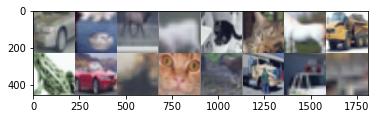

In [101]:
plt.imshow(img)